# 3-D visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
## Computational domain plot

### Plot sphere

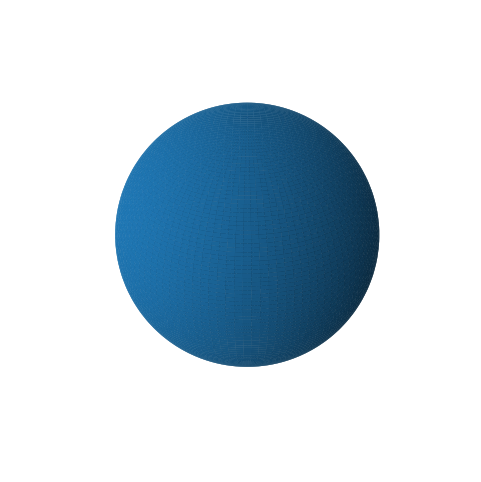

In [4]:
fig = plt.figure(figsize=(6,6))

# plot sphere
p = np.linspace(0, 2*np.pi, 100)
t = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(p), np.sin(t))
y = np.outer(np.sin(p), np.sin(t))
z = np.outer(np.ones(np.size(p)), np.cos(t))
ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.plot_surface(x, y, z, rcount=100, ccount=100)
ax.set_box_aspect([1.0, 1.0, 1.0])
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([-1, 1])
ax.set_zlim3d([-1, 1])
ax.set_axis_off()

plt.savefig("./out/imgs/Model_domain_3D.svg", format="svg", bbox_inches="tight", transparent=True)

plt.show()

### Plot disk and sphere

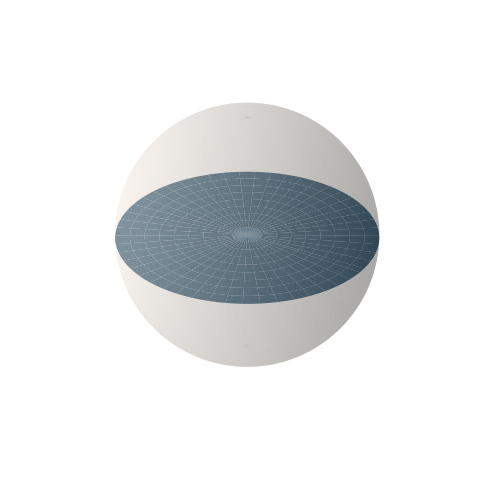

In [2]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection="3d")

s = np.linspace(0, 1, 10)
p = np.linspace(0, 2*np.pi, 100)
x = np.outer(s, np.cos(p))
y = np.outer(s, np.sin(p))
z = np.zeros_like(x)
ax.plot_surface(x, y, z, rcount=100, ccount=50, color='tab:blue')

p = np.linspace(0, 2*np.pi, 100)
t = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(p), np.sin(t))
y = np.outer(np.sin(p), np.sin(t))
z = np.outer(np.ones(np.size(p)), np.cos(t))
ax.plot_surface(x, y, z, rcount=100, ccount=100, color="linen", alpha=0.3)

# p = np.linspace(0, 2*np.pi, 100)
# x = np.cos(p)
# y = np.sin(p)
# z = np.zeros_like(x)
# ax.plot(z, x, y, 'k', alpha=.75)
# ax.plot(x, z, y, 'k', alpha=.75)

ax.set_box_aspect([1.0, 1.0, 1.0])
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([-1, 1])
ax.set_zlim3d([-1, 1])

ax.set_axis_off()

plt.savefig("./out/imgs/Model_domain_PG.svg", format="svg", bbox_inches="tight", transparent=True)
plt.show()

In [37]:
import numpy as np
import pyvista as pv
pv.set_jupyter_backend('static')

In [38]:
def _cell_bounds(points, bound_position=0.5):
    """
    Calculate coordinate cell boundaries.

    Parameters
    ----------
    points: numpy.ndarray
        One-dimensional array of uniformly spaced values of shape (M,).

    bound_position: bool, optional
        The desired position of the bounds relative to the position
        of the points.

    Returns
    -------
    bounds: numpy.ndarray
        Array of shape (M+1,)

    Examples
    --------
    >>> a = np.arange(-1, 2.5, 0.5)
    >>> a
    array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])
    >>> cell_bounds(a)
    array([-1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25])
    """
    if points.ndim != 1:
        raise ValueError("Only 1D points are allowed.")
    diffs = np.diff(points)
    delta = diffs[0] * bound_position
    bounds = np.concatenate([[points[0] - delta], points + delta])
    return bounds

In [39]:
# First, create some dummy data

# Approximate radius of the Earth
RADIUS = 6371.0

# Longitudes and latitudes
x = np.arange(0, 360, 5)
y = np.arange(-90, 91, 5)
y_polar = 90.0 - y  # grid_from_sph_coords() expects polar angle
r = np.arange(0.05, 1, 0.1)

rr, xx, yy = np.meshgrid(r, x, y, indexing='ij')

# x- and y-components of the wind vector
u_vec = np.cos(np.radians(xx))  # zonal
v_vec = np.sin(np.radians(yy))  # meridional

# Scalar data
scalar = u_vec**2 + v_vec**2

# Create arrays of grid cell boundaries, which have shape of (x.shape[0] + 1)
xx_bounds = _cell_bounds(x)
yy_bounds = _cell_bounds(y_polar)
# levels = [RADIUS * 1.01]
levels = _cell_bounds(r)

In [40]:
grid_scalar = pv.grid_from_sph_coords(xx_bounds, yy_bounds, levels)
grid_scalar

StructuredGrid,Information
N Cells,26640
N Points,30514
X Bounds,"-9.981e-01, 9.981e-01"
Y Bounds,"-9.981e-01, 9.981e-01"
Z Bounds,"-9.990e-01, 9.990e-01"
Dimensions,"38, 73, 11"
N Arrays,0


In [41]:
grid_scalar.cell_data["example"] = np.array(scalar).ravel("C")
slice_cartesian = grid_scalar.slice_orthogonal()
clip_cartesian = grid_scalar.clip_box([0, 2, 0, 2, 0, 2])

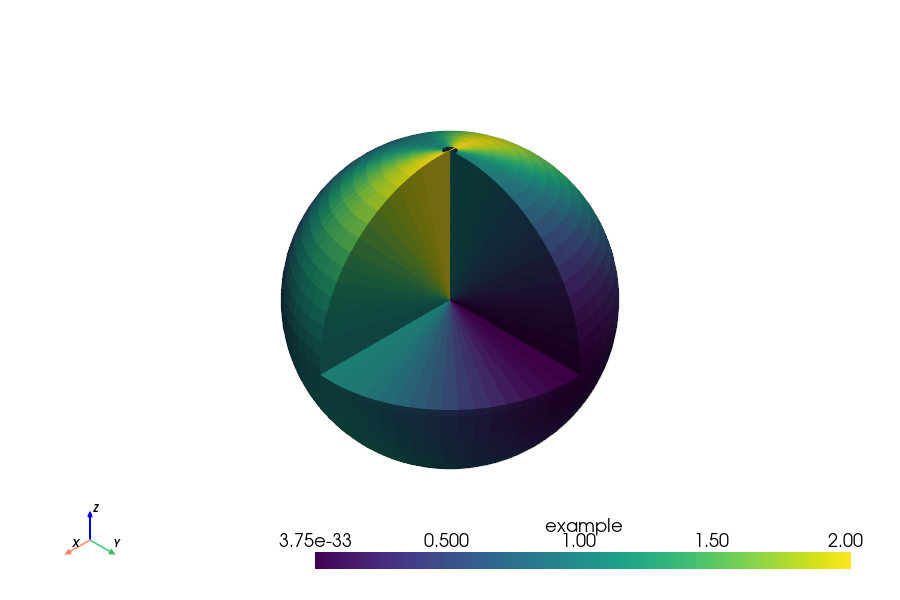

In [42]:
# Make a plot
p = pv.Plotter()
p.show_axes()
# p.add_mesh(pv.Sphere(radius=RADIUS))
# p.add_mesh(grid_scalar)
# p.add_mesh(slice_cartesian, lighting=False, cmap="plasma")
p.add_mesh(clip_cartesian, lighting=True)
p.show(window_size=[900, 600])

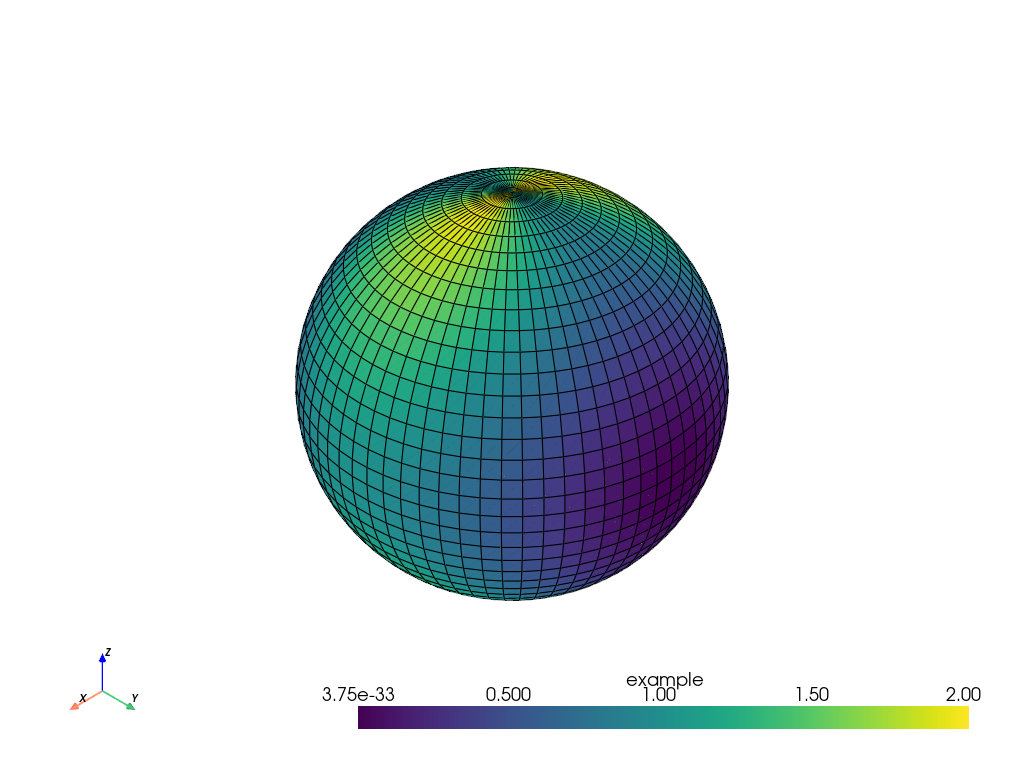

In [7]:
grid_scalar.plot(show_edges=True, lighting=False)

In [45]:
with np.load("./out/cases/Malkus/3darray.npz") as array_obj:
    r_array = array_obj["r_array"]
    theta_array = array_obj["theta_array"]
    phi_array = array_obj["phi_array"]
    Zeta = array_obj["Zeta"]
    Uz = array_obj["Uz"]

In [46]:
phi_bounds = _cell_bounds(phi_array)
theta_bounds = _cell_bounds(theta_array)
r_bounds = _cell_bounds(r_array)

R_mesh, Theta_mesh, Phi_mesh = np.meshgrid(r_array, theta_array, phi_array, indexing='ij')
example_scalar = np.cos(np.radians(Theta_mesh))**2 + np.sin(np.radians(Phi_mesh))**2

grid_scalar = pv.grid_from_sph_coords(phi_bounds, theta_bounds, r_bounds)
grid_scalar.cell_data["Zeta"] = np.real(Zeta.ravel('C'))
# grid_scalar.cell_data["Zeta"] = np.real(Zeta.swapaxes(1, 2).ravel('C'))
# grid_scalar.cell_data["example"] = example_scalar.ravel('C')

In [48]:
clip_cartesian = grid_scalar.clip_box([0, 2, 0, 2, 0, 2])
clip_plane = grid_scalar.clip(normal='x', origin=np.array([0., 0., 0.]))

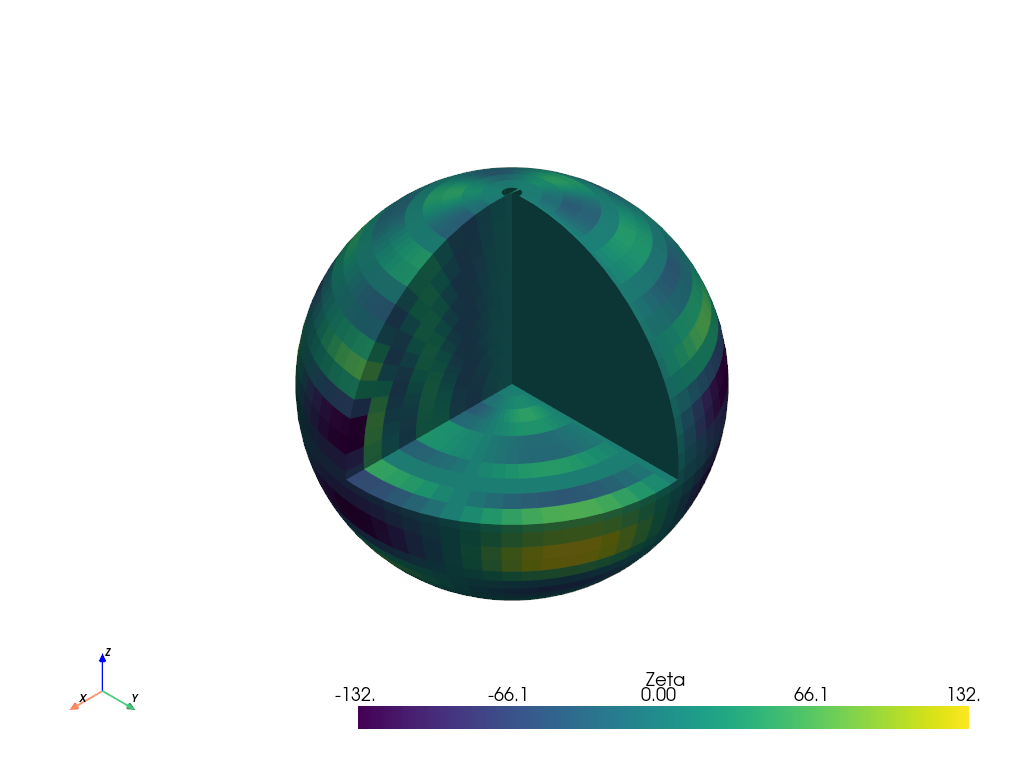

In [51]:
# Make a plot
pvplot = pv.Plotter()
pvplot.show_axes()
# p.add_mesh(pv.Sphere(radius=RADIUS))
# pvplot.add_mesh(grid_scalar, lighting=False)
pvplot.add_mesh(clip_cartesian, lighting=True)
# pvplot.add_mesh(clip_plane, lighting=False)
pvplot.show()

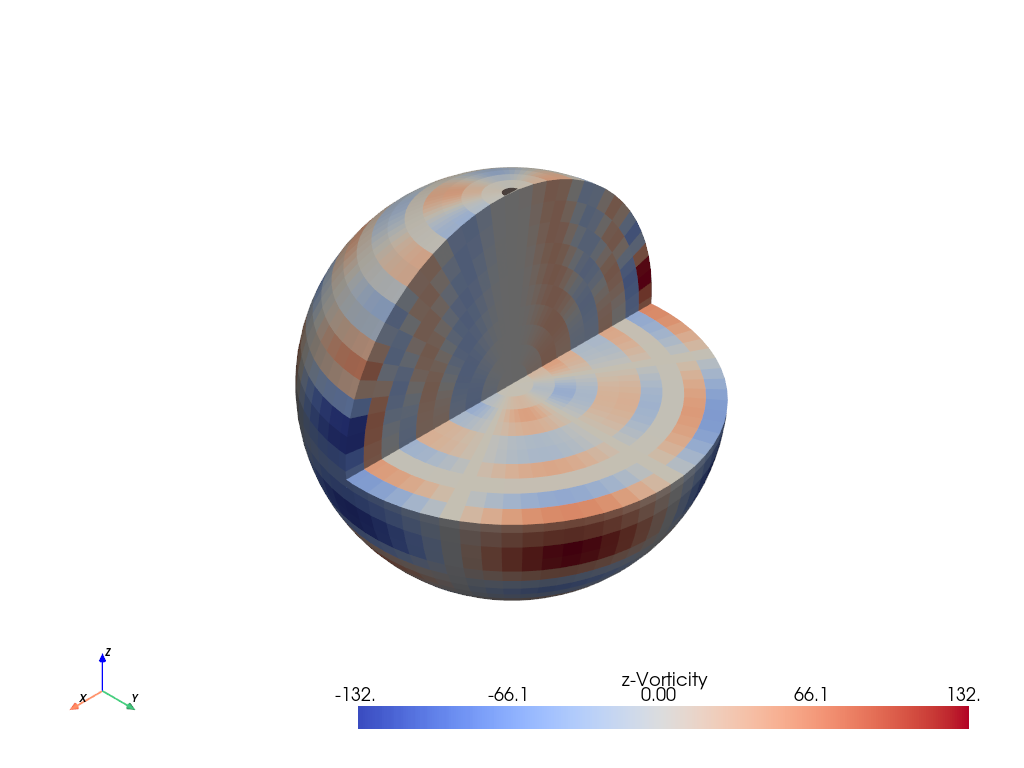

In [58]:
grid_scalar = pv.grid_from_sph_coords(phi_bounds, theta_bounds, r_bounds)
grid_scalar.cell_data["z-Vorticity"] = np.real(Zeta.ravel('C'))
clip_cartesian = grid_scalar.clip_box([-2, 2, 0, 2, 0, 2])

# Make a plot
pvplot = pv.Plotter()
pvplot.show_axes()
# p.add_mesh(pv.Sphere(radius=RADIUS))
# pvplot.add_mesh(grid_scalar, lighting=False)
pvplot.add_mesh(clip_cartesian, lighting=True, cmap="coolwarm")
# pvplot.add_mesh(clip_plane, lighting=False)
pvplot.show()

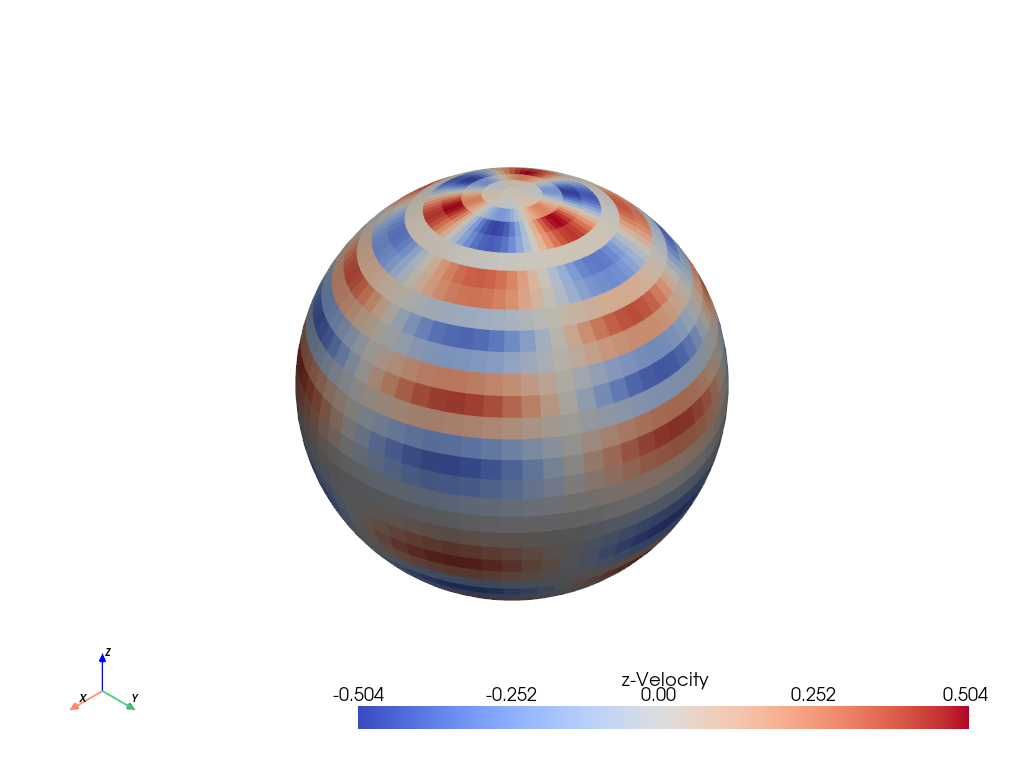

In [57]:
grid_scalar = pv.grid_from_sph_coords(phi_bounds, theta_bounds, r_bounds)
grid_scalar.cell_data["z-Velocity"] = np.real(Uz.ravel('C'))
# clip_cartesian = grid_scalar.clip_box([-2, 2, 0, 2, 0, 2])

# Make a plot
pvplot = pv.Plotter()
pvplot.show_axes()
# p.add_mesh(pv.Sphere(radius=RADIUS))
pvplot.add_mesh(grid_scalar, lighting=True, cmap="coolwarm")
# pvplot.add_mesh(clip_cartesian, lighting=True)
# pvplot.add_mesh(clip_plane, lighting=False)
pvplot.show()